In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Download historical data
data = yf.download(['AAPL', 'MSFT'], start='2021-01-01', end='2021-12-31')
# data.to_csv("aaplmsftdataset.csv")

[*********************100%***********************]  2 of 2 completed


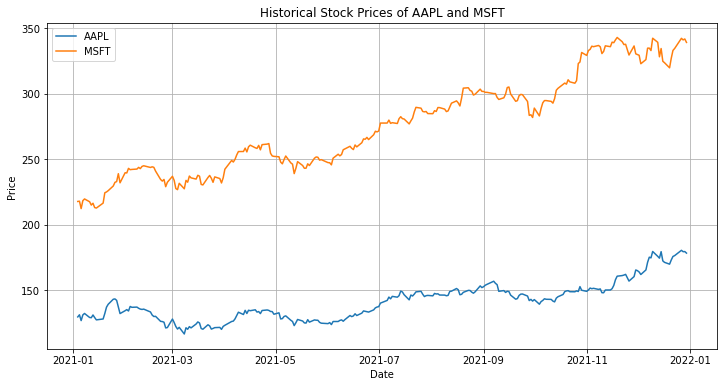

In [2]:
# Plot the historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(data['Close']['AAPL'], label='AAPL')
plt.plot(data['Close']['MSFT'], label='MSFT')
plt.title('Historical Stock Prices of AAPL and MSFT')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()

In [3]:
# Feature engineering
data['AAPL_return'] = data['Close']['AAPL'].pct_change()
data['MSFT_return'] = data['Close']['MSFT'].pct_change()
data['Spread'] = data['AAPL_return'] - data['MSFT_return']

# Create the target variable
data['Signal'] = np.where(data['Spread'] > 0, 1, 0)

# fill the null values with 0
data['AAPL_return'] = data['AAPL_return'].fillna(0)
data['MSFT_return'] = data['MSFT_return'].fillna(0)

# Prepare the data for machine learning
X = data[['AAPL_return', 'MSFT_return']]
y = data['Signal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Implement a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
# Make predictions
predictions = rf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy of the Random Forest Classifier: {accuracy}')

Accuracy of the Random Forest Classifier: 0.9019607843137255


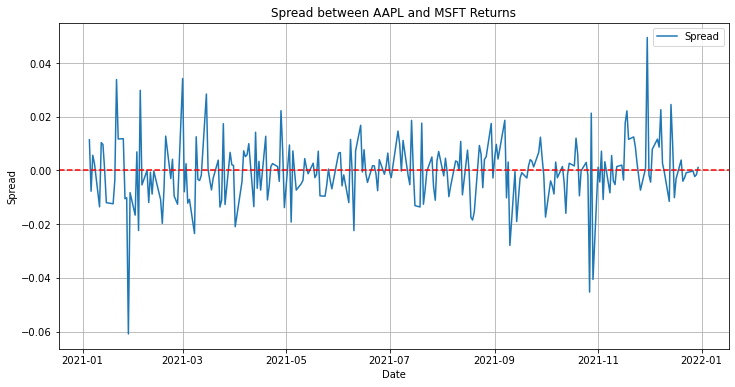

In [6]:
# Plot showing the spread
plt.figure(figsize=(12, 6))
plt.plot(data.index.values, data['Spread'].values, label='Spread')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Spread between AAPL and MSFT Returns')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid()